In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

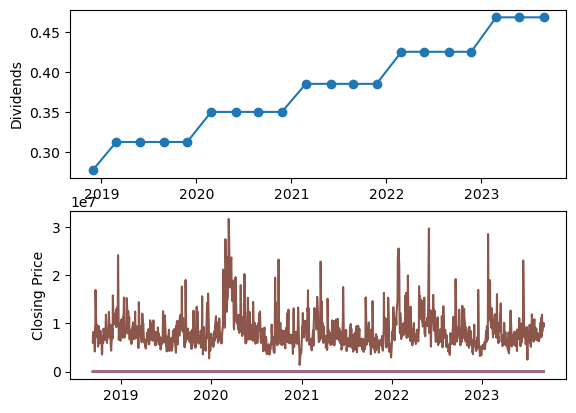

In [12]:
df_dividends=pd.read_csv('NEE_dividend.csv',parse_dates=['Date'])
df_closing_price=pd.read_csv('NEE.csv',parse_dates=['Date'])

df_dividends.set_index('Date',inplace=True)
df_closing_price.set_index('Date',inplace=True)


fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(df_dividends, marker='o')
ax1.set_ylabel('Dividends')

ax2.plot(df_closing_price)
ax2.set_ylabel('Closing Price')
plt.show()

            lower Dividends  upper Dividends
Date                                        
2022-08-29         0.397532         0.466613
2022-11-23         0.381569         0.450562
2023-02-27         0.396692         0.465606
2023-05-26         0.422298         0.491141
2023-08-29         0.440178         0.508958


C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. U

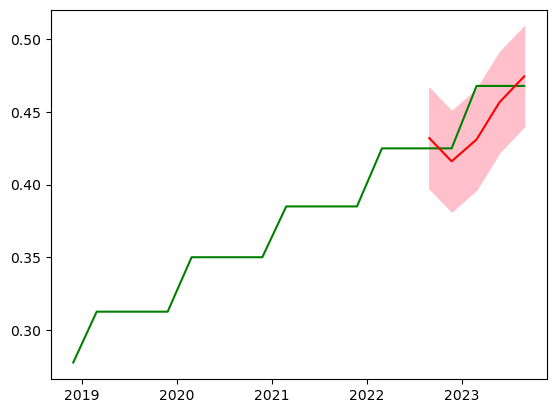

In [10]:
model=ARIMA(df_dividends, order=(2,0,1))
results=model.fit()
forecast=results.get_prediction(start=-5)
mean_forecast=forecast.predicted_mean

#print(mean_forecast)

confidence_intervals=forecast.conf_int()
print(confidence_intervals)
lower_limit = confidence_intervals['lower Dividends']
upper_limit = confidence_intervals['upper Dividends']

plt.plot(df_dividends.index,df_dividends,color='green',label='NEE')
plt.plot(mean_forecast.index, mean_forecast.values, color='red',label='forecast')
plt.fill_between(dates,lower_limit, upper_limit, color='pink')
plt.show()

C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


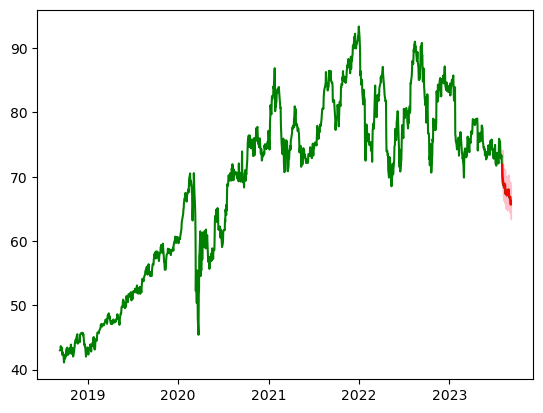

In [20]:
model=ARIMA(df_closing_price['Close'], order=(2,0,1))
results=model.fit()
forecast=results.get_prediction(start=-25)
mean_forecast=forecast.predicted_mean
confidence_intervals=forecast.conf_int()
lower_limit = confidence_intervals['lower Close']
upper_limit = confidence_intervals['upper Close']

plt.plot(df_closing_price.index,df_closing_price['Close'],color='green',label='NEE')
plt.plot(mean_forecast.index, mean_forecast.values, color='red',label='forecast')
plt.fill_between(lower_limit.index,lower_limit, upper_limit, color='pink')
plt.show()